In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df = pd.read_parquet('train-00000-of-00001.parquet')

emotion_map = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}


In [49]:
import re

def normalize_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

df['text'] = df['text'].apply(normalize_text)


In [50]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    return ' '.join([word for word in words if word not in stop_words])

df['text'] = df['text'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

df['tokens'] = df['text'].apply(word_tokenize)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


label
0    121187
1    141067
2     34554
3     57317
4     47712
5     14972
Name: count, dtype: int64


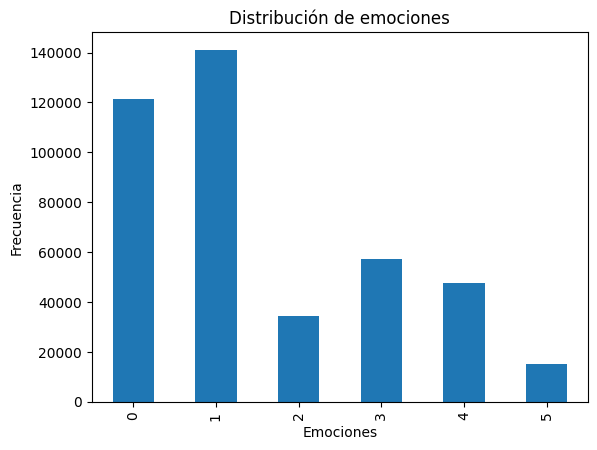

In [53]:
label_counts = df['label'].value_counts().sort_index()
print(label_counts)

label_counts.plot(kind='bar', title='Distribución de emociones', xlabel='Emociones', ylabel='Frecuencia')
plt.show()

In [54]:
label_proportion = df['label'].value_counts(normalize=True)
print(label_proportion)

label
1    0.338445
0    0.290749
3    0.137514
4    0.114470
2    0.082901
5    0.035921
Name: proportion, dtype: float64


In [55]:
df['text_length'] = df['text'].apply(len)
print(df['text_length'].describe())

count    416809.000000
mean         61.718811
std          35.378303
min           0.000000
25%          35.000000
50%          54.000000
75%          81.000000
max         474.000000
Name: text_length, dtype: float64


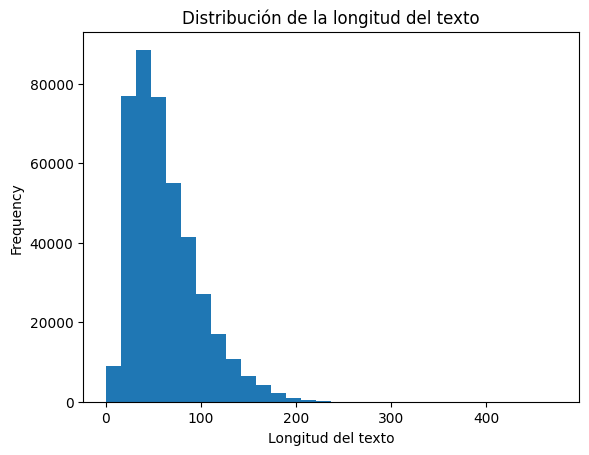

In [56]:
df['text_length'].plot(kind='hist', bins=30, title='Distribución de la longitud del texto')
plt.xlabel('Longitud del texto')
plt.show()

In [57]:
length_by_label = df.groupby('label')['text_length'].describe()
print(length_by_label)

          count       mean        std   min   25%   50%   75%    max
label                                                               
0      121187.0  59.419418  34.988122   0.0  33.0  52.0  78.0  323.0
1      141067.0  62.769762  35.403254   0.0  36.0  55.0  82.0  282.0
2       34554.0  65.960960  35.856218   8.0  39.0  59.0  86.0  249.0
3       57317.0  60.917267  35.678358   0.0  34.0  53.0  80.0  474.0
4       47712.0  61.853475  35.204518   0.0  35.0  54.0  81.0  252.0
5       14972.0  63.277451  35.168865  10.0  37.0  56.0  82.0  248.0


In [58]:
from collections import Counter

word_counts = Counter(" ".join(df['text']).split())
most_common_words = word_counts.most_common(20)
print("Palabras más comunes:", most_common_words)


Palabras más comunes: [('feel', 289939), ('feeling', 134185), ('like', 73972), ('im', 61662), ('really', 25862), ('know', 23766), ('time', 21292), ('get', 19571), ('little', 19193), ('people', 18125), ('would', 17961), ('want', 16441), ('one', 16041), ('think', 15871), ('still', 15747), ('ive', 14866), ('even', 14850), ('much', 14426), ('life', 14009), ('something', 13417)]


In [59]:
for label in df['label'].unique():
    texts = df[df['label'] == label]['text']
    word_counts = Counter(" ".join(texts).split())
    print(f"Palabras más comunes para la emoción {label}: {word_counts.most_common(10)}")


Palabras más comunes para la emoción 0: [('feel', 84184), ('feeling', 40849), ('like', 22167), ('im', 17631), ('really', 7533), ('know', 7183), ('time', 6133), ('little', 5719), ('get', 5410), ('ive', 5172)]
Palabras más comunes para la emoción 1: [('feel', 102709), ('feeling', 40953), ('like', 25245), ('im', 20445), ('really', 8506), ('time', 7323), ('know', 7159), ('get', 6523), ('would', 5916), ('people', 5794)]
Palabras más comunes para la emoción 2: [('feel', 24463), ('feeling', 10303), ('like', 7558), ('im', 4775), ('love', 2365), ('really', 2247), ('know', 2077), ('people', 1705), ('would', 1694), ('time', 1690)]
Palabras más comunes para la emoción 3: [('feel', 37717), ('feeling', 19236), ('like', 10367), ('im', 9298), ('really', 3771), ('know', 3399), ('get', 3340), ('people', 3074), ('time', 2937), ('little', 2826)]
Palabras más comunes para la emoción 4: [('feel', 30913), ('feeling', 17673), ('im', 7550), ('like', 6260), ('little', 3518), ('know', 3040), ('really', 2800), ('